# NYC Covid-19 Analysis

Thanks to the NYC Department of Health and Mental Hygine, daily COVID-19 data on testings, areas being tested, age, sex, etc. have been made available for people to see. Toady, I will just be trying to look at some initial analysis on whats been happening throughout the New York Area. Show any trends throughout daily information as well as any hotspots in the area. 

## Data Sets Provided

Daily updates are provided for the data at https://github.com/nychealth/coronavirus-data

# Import 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# Cleaning and Merging 

We first scrapped data on the NYC boroughs and all zipcodes within them from:
https://www.health.ny.gov/statistics/cancer/registry/appendix/neighborhoods.htm 

Mannual cleaning in excel was peformed to list each zipcode with its borough.

In [2]:
bz = pd.read_csv('Bourgh_zipcodes.csv')

In [3]:
bz.head()

,Borough,ZIP Codes
0,Bronx,"10453, 10457, 10460, 10458, 10467, 10468, 1045..."
1,Brooklyn,"11212, 11213, 11216, 11233, 11238, 11209, 1121..."
2,Manhattan,"10026, 10027, 10030, 10037, 10039, 10001, 1001..."
3,Queens,"11361, 11362, 11363, 11364, 11354, 11355, 1135..."
4,Staten Island,"10302, 10303, 10310, 10306, 10307, 10308, 1030..."


In [4]:
zips = [bz['ZIP Codes'][i].strip().split(',') for i in range(0,5)]

In [5]:
bronx = pd.DataFrame({'BOROUGH': 'Bronx', 'zip_codes':zips[0]})

In [6]:
brook = pd.DataFrame({'BOROUGH': 'Brooklyn', 'zip_codes':zips[1]})

In [7]:
manhattan = pd.DataFrame({'BOROUGH': 'Manhattan', 'zip_codes':zips[2]})

In [8]:
queens = pd.DataFrame({'BOROUGH': 'Queens', 'zip_codes':zips[3]})

In [9]:
si = pd.DataFrame({'BOROUGH': 'Staten Island', 'zip_codes':zips[4]})

In [10]:
borough_zips = pd.concat([bronx, brook, manhattan, queens, si])

In [11]:
borough_zips['zip_codes'] = borough_zips['zip_codes'].astype('int64')

Since information is made daily for us, these functions created below will update our csv's so that we will have the latest data made availble for our visualizations. 

In [12]:
old_date = '4:8'
new_date = '4:9'

In [13]:
#Function for updating positive test by Borough and Zipcode
def update_testing (new_date):
    test_zip = pd.read_csv(f'coronavirus-data {new_date}/tests-by-zcta.csv')
    test_zip.drop(0, inplace = True)
    test_zip['MODZCTA'] = test_zip['MODZCTA'].astype('int64')
    test_zip.rename(columns = {'MODZCTA': 'zip_codes'}, inplace = True)
    testing = pd.merge(left = borough_zips,
        right = test_zip,
        how = 'inner',
        on = 'zip_codes')
    boro = pd.read_csv(f'coronavirus-data {new_date}/boro.csv')
    boro.drop(5,inplace = True)
    boro.loc[:, 'BOROUGH_GROUP'] = testing['BOROUGH'].unique()
    boro.rename(columns = {'BOROUGH_GROUP': 'BOROUGH'}, inplace = True)
    testing_borough = pd.merge(left = testing,
        right = boro,
        how = 'inner',
        on = 'BOROUGH')
    return testing_borough.to_csv('master_tests.csv',index = False)

In [14]:
update_testing(new_date)

In [15]:
#Function for updating Summary
def update_summary (old_date,new_date): #remember in 4:2 format for april 2nd()
    old_sum = pd.read_csv(f'master_summary_{old_date}.csv')#.T #- remove # before t if needed to update
    #incase file is overwritten, rewrite using the following code 
    #old_sum.columns = old_sum.iloc[0]
    #old_sum.drop('Cases:', inplace = True)
    #old_sum['Cases'] = old_sum.index
    #old_sum['As of:'] = pd.to_datetime(old_sum['As of:'])

    new_sum = pd.read_csv(f'coronavirus-data {new_date}/summary.csv').T
    new_sum.columns = new_sum.iloc[0]
    new_sum.drop('Cases:', inplace = True)
    new_sum['Cases'] = new_sum.index
    new_sum['As of:'] = pd.to_datetime(new_sum['As of:'])
    
    merged = pd.concat([old_sum,new_sum])
    merged.reset_index(inplace = True)
    merged.drop(columns = 'index', inplace = True)
    merged.to_csv(f'master_summary_{new_date}.csv', index = False)
     
    return merged.head()


In [16]:
update_summary(old_date,new_date)

Cases:,Total hospitalized*:,Deaths:,As of:,Cases
0,10590,1562,2020-04-02 17:00:00,49707
1,14205,2472,2020-04-05 17:00:00,64955
2,15333,2738,2020-04-06 17:00:00,68776
3,4712,364,2020-03-26 17:00:00,23112
4,5039,450,2020-03-27 17:00:00,26697


In [17]:
summary = pd.read_csv(f'master_summary_{new_date}.csv')
date = [i.split(' ') for i in summary['As of:']]
summary['dates'] = [date[i][0] for i in range(len(date))]
del summary['As of:']
summary.set_index(['dates'], inplace = True)
summary = summary.sort_values(by = 'dates')
summary.head()

,Total hospitalized*:,Deaths:,Cases
dates,,,
2020-03-26,4712,364,23112
2020-03-27,5039,450,26697
2020-03-30,7741,914,38087
2020-03-31,8549,1096,41771
2020-04-01,9775,1374,45707


In [42]:
case = pd.read_csv(f'coronavirus-data {new_date}/case-hosp-death.csv')
case['DATE_OF_INTEREST'] = pd.to_datetime(case['DATE_OF_INTEREST'])
case.set_index(['DATE_OF_INTEREST'], inplace = True)

In [43]:
case.head()

,NEW_COVID_CASE_COUNT,HOSPITALIZED_CASE_COUNT,DEATH_COUNT
DATE_OF_INTEREST,,,
2020-03-02,1,11.0,NaN
2020-03-03,3,8.0,NaN
2020-03-04,10,9.0,NaN
2020-03-05,2,13.0,NaN
2020-03-06,8,10.0,NaN


In [44]:
case['NCCC_diff1'] = case['NEW_COVID_CASE_COUNT'].diff(1)

In [45]:
case.head()

,NEW_COVID_CASE_COUNT,HOSPITALIZED_CASE_COUNT,DEATH_COUNT,NCCC_diff1
DATE_OF_INTEREST,,,,
2020-03-02,1,11.0,NaN,NaN
2020-03-03,3,8.0,NaN,2.0
2020-03-04,10,9.0,NaN,7.0
2020-03-05,2,13.0,NaN,-8.0
2020-03-06,8,10.0,NaN,6.0


In [46]:
case.to_csv(f'coronavirus-data {new_date}/case-hosp-death.csv')

In [20]:
def update_age (old_date,new_date):
    old_age = pd.read_csv(f'master_age_{old_date}.csv')
    #old_age['date'] = f'{old_date[0]}/{old_date[2]}/2020'
    #old_age['date'] = pd.to_datetime(old_age['date'])
    
    new_age = pd.read_csv(f'coronavirus-data {new_date}/by-age.csv')
    new_age['date'] = f'{new_date[0]}/{new_date[2]}/2020'
    new_age['date'] = pd.to_datetime(new_age['date'])
    
    merged = pd.concat([old_age,new_age])
    merged.reset_index(inplace = True)
    merged.drop(columns = 'index', inplace = True)
    merged['date'] = pd.to_datetime(merged['date'])
    merged.to_csv(f'master_age_{new_date}.csv', index = False)
    
    return merged.head()

In [21]:
update_age(old_date, new_date)

,AGE_GROUP,COVID_CASE_RATE,HOSPITALIZED_CASE_RATE,DEATH_RATE,date
0,0-17 years,51.02,5.10,0.06,2020-04-02
1,18-44 years,602.82,53.92,2.67,2020-04-02
2,45-64 years,851.00,192.70,18.58,2020-04-02
3,65-74 years,871.81,328.99,53.78,2020-04-02
4,75 and older years,879.56,442.98,130.35,2020-04-02


In [22]:
age = pd.read_csv(f'master_age_{new_date}.csv')
age['date'] = pd.to_datetime(age['date'])
age.set_index(['date'], inplace = True)
age = age.sort_values(by = 'date')
age.head()

,AGE_GROUP,COVID_CASE_RATE,HOSPITALIZED_CASE_RATE,DEATH_RATE
date,,,,
2020-03-26,Citywide total,275.18,56.20,4.35
2020-03-26,75 and older years,353.76,188.13,33.09
2020-03-26,65-74 years,375.76,135.31,13.02
2020-03-26,45-64 years,382.72,85.07,3.75
2020-03-26,18-44 years,301.07,28.19,0.47


In [23]:
def update_sex (old_date,new_date):
    old_sex = pd.read_csv(f'master_sex_{old_date}.csv')
    #old_sex['date'] = f'{old_date[0]}/{old_date[2]}/2020'
    #old_sex['date'] = pd.to_datetime(old_sex['date'])
    
    new_sex = pd.read_csv(f'coronavirus-data {new_date}/by-sex.csv')
    new_sex['date'] = f'{new_date[0]}/{new_date[2]}/2020'
    new_sex['date'] = pd.to_datetime(new_sex['date'])
    
    merged = pd.concat([old_sex, new_sex])
    merged.reset_index(inplace = True)
    merged.drop(columns = 'index', inplace = True)
    merged['date'] = pd.to_datetime(merged['date'])
    merged.to_csv(f'master_sex_{new_date}.csv', index = False)
    
    return merged.head()

In [24]:
update_sex(old_date, new_date)

,SEX_GROUP,COVID_CASE_RATE,HOSPITALIZED_CASE_RATE,DEATH_RATE,date
0,Female,511.86,97.71,13.41,2020-04-02
1,Male,677.86,157.14,24.24,2020-04-02
2,Citywide total,591.84,126.09,18.60,2020-04-02
3,Female,673.99,130.08,20.94,2020-04-05
4,Male,880.09,211.86,38.69,2020-04-05


In [25]:
sex = pd.read_csv(f'master_sex_{new_date}.csv')
sex['date'] = pd.to_datetime(sex['date'])
sex.set_index(['date'], inplace = True)
sex = sex.sort_values(by = 'date')
sex.tail()

,SEX_GROUP,COVID_CASE_RATE,HOSPITALIZED_CASE_RATE,DEATH_RATE
date,,,,
2020-04-08,Male,1079.41,302.75,63.08
2020-04-08,Citywide total,954.95,243.77,50.72
2020-04-09,Male,1178.07,318.75,71.09
2020-04-09,Female,913.66,196.19,39.25
2020-04-09,Citywide total,1044.50,256.84,56.89


# EDA

Text(0, 0.5, 'Case Rate')

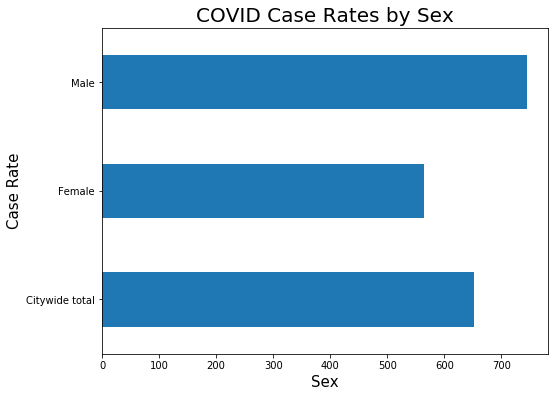

In [26]:
plt.figure(figsize=(8, 6))
sex.groupby('SEX_GROUP')['COVID_CASE_RATE'].mean().plot(kind = 'barh' )
plt.title('COVID Case Rates by Sex', fontsize = 20)
plt.xlabel('Sex', fontsize = 15)
plt.ylabel('Case Rate', fontsize = 15)

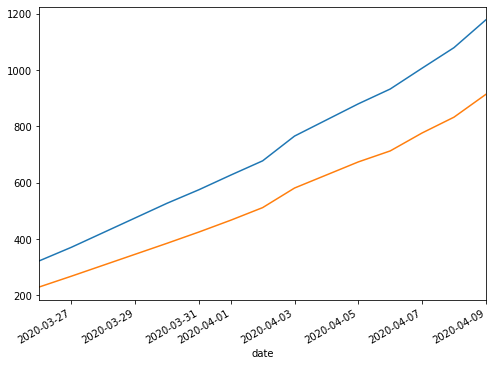

In [27]:
plt.figure(figsize=(8, 6))
sex.loc[(sex['SEX_GROUP'] == 'Male'),'COVID_CASE_RATE'].plot()
sex.loc[(sex['SEX_GROUP'] == 'Female'), 'COVID_CASE_RATE'].plot()

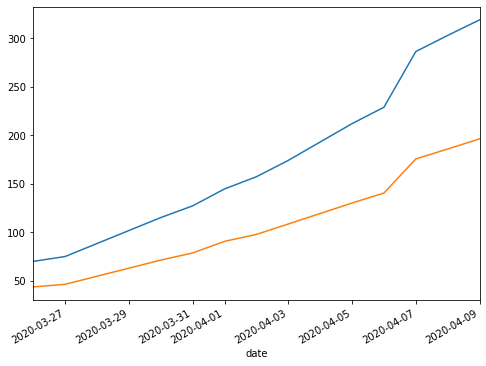

In [28]:
plt.figure(figsize=(8, 6))
sex.loc[(sex['SEX_GROUP'] == 'Male'),'HOSPITALIZED_CASE_RATE'].plot()
sex.loc[(sex['SEX_GROUP'] == 'Female'), 'HOSPITALIZED_CASE_RATE'].plot()

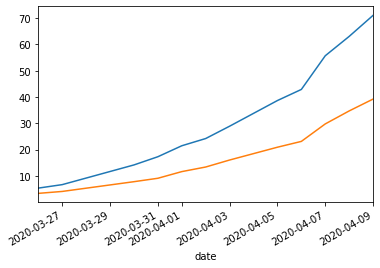

In [29]:
sex.loc[(sex['SEX_GROUP'] == 'Male'),'DEATH_RATE'].plot()
sex.loc[(sex['SEX_GROUP'] == 'Female'), 'DEATH_RATE'].plot()

<Figure size 576x432 with 0 Axes>

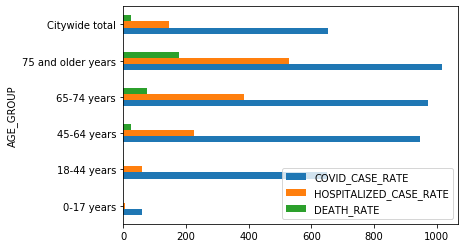

In [30]:
plt.figure(figsize=(8, 6))
age.groupby('AGE_GROUP').mean().plot(kind = 'barh')

<Figure size 576x432 with 0 Axes>

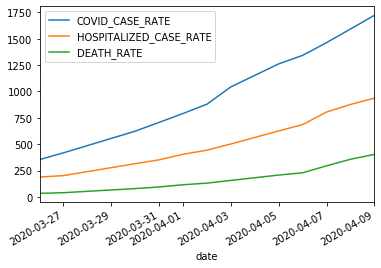

In [31]:
plt.figure(figsize=(8, 6))
age[age['AGE_GROUP'] == '75 and older years'].plot()

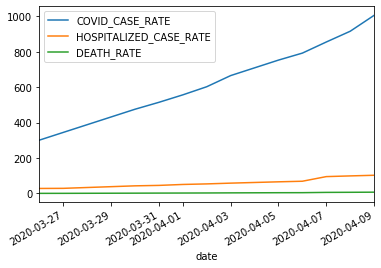

In [32]:

age[age['AGE_GROUP'] == '18-44 years'].plot()

<Figure size 864x432 with 0 Axes>

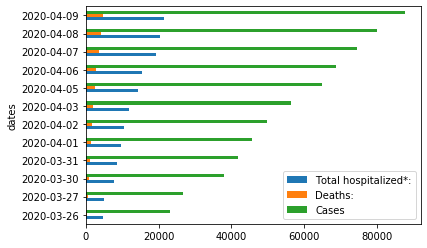

In [33]:
plt.figure(figsize=(12, 6))
summary.plot(kind = 'barh')

In [34]:
summary.diff(1)

,Total hospitalized*:,Deaths:,Cases
dates,,,
2020-03-26,NaN,NaN,NaN
2020-03-27,327.0,86.0,3585.0
2020-03-30,2702.0,464.0,11390.0
2020-03-31,808.0,182.0,3684.0
2020-04-01,1226.0,278.0,3936.0
2020-04-02,815.0,188.0,4000.0
2020-04-03,1149.0,305.0,6582.0
2020-04-05,2466.0,605.0,8666.0
2020-04-06,1128.0,266.0,3821.0


In [35]:
summary_diff1 = summary.diff(1).dropna()
summary_diff1

,Total hospitalized*:,Deaths:,Cases
dates,,,
2020-03-27,327.0,86.0,3585.0
2020-03-30,2702.0,464.0,11390.0
2020-03-31,808.0,182.0,3684.0
2020-04-01,1226.0,278.0,3936.0
2020-04-02,815.0,188.0,4000.0
2020-04-03,1149.0,305.0,6582.0
2020-04-05,2466.0,605.0,8666.0
2020-04-06,1128.0,266.0,3821.0
2020-04-07,3844.0,806.0,5825.0


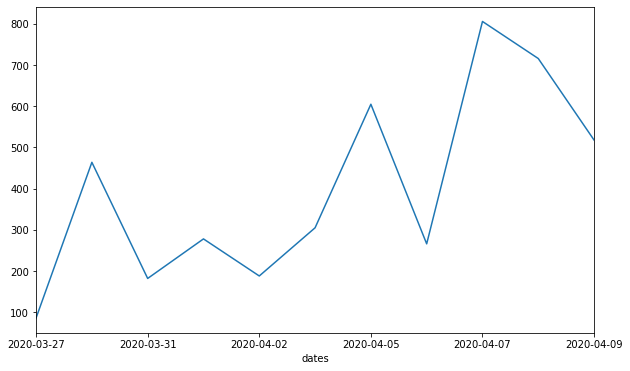

In [36]:
plt.figure(figsize = (10,6))
summary_diff1['Deaths:'].plot()

In [37]:
case['rolling_week_NCCC'] = case['NEW_COVID_CASE_COUNT'].rolling(7).mean()

In [38]:
case['NCCC_diff1'] = case['NEW_COVID_CASE_COUNT'].diff(1)

In [39]:
case.head()

,NEW_COVID_CASE_COUNT,HOSPITALIZED_CASE_COUNT,DEATH_COUNT,rolling_week_NCCC,NCCC_diff1
DATE_OF_INTEREST,,,,,
2020-03-02,1,11.0,NaN,NaN,NaN
2020-03-03,3,8.0,NaN,NaN,2.0
2020-03-04,10,9.0,NaN,NaN,7.0
2020-03-05,2,13.0,NaN,NaN,-8.0
2020-03-06,8,10.0,NaN,NaN,6.0
